Importing necessary libraries<br>
The following are the libraries which we are going to use in our project.

In [1]:
import os
import glob as gb
import pandas as pd
from tensorflow import keras

from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

Creating path variables for the data.<br>
TRAIN_DIR : stores path for the training images<br>
TEST_DIR : stores path for the test images<br>
Batch_size : the amount of images to be fed to the model at one time<br>

In [2]:
TRAIN_DIR = "D:/emotiondataset/eINTERFACE_2021_Image/train"
TEST_DIR = "D:/emotiondataset/eINTERFACE_2021_Image/test"
batch_size = 64

In [3]:
for folder in os.listdir(TRAIN_DIR):
    files = gb.glob(pathname=str(TRAIN_DIR+'/'+folder+'/*.jpg'))
    print(f'For training data , found {len(files)} in folder {folder}')

For training data , found 1896 in folder Anger
For training data , found 1891 in folder Disgust
For training data , found 1922 in folder Fear
For training data , found 1922 in folder Happiness
For training data , found 1922 in folder Sadness
For training data , found 1922 in folder Surprise


In [4]:
for folder in os.listdir(TEST_DIR):
    files = gb.glob(pathname=str(TEST_DIR+'/'+folder+'/*.jpg'))
    print(f'For testing data, found {len(files)} in folder {folder}')

For testing data, found 237 in folder Anger
For testing data, found 237 in folder Disgust
For testing data, found 241 in folder Fear
For testing data, found 241 in folder Happiness
For testing data, found 241 in folder Sadness
For testing data, found 241 in folder Surprise


In [5]:
import random
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

Creating a function to load random image from the given training dataset.

In [6]:
def view_random_image(target_dir, target_class):
    target_folder = target_dir + target_class
    random_image = random.sample(os.listdir(target_folder), 1)
    
    img = mpimg.imread(target_folder+'/'+random_image[0])
    plt.imshow(img)
    plt.title(target_class)
    plt.axis('off')
    print(f'Image Shape {img.shape}')
    
    return img

In [7]:
class_names = ['Anger','Disgust','Fear','Happiness','Sadness','Surprise']

Image Shape (416, 416, 3)
Image Shape (416, 416, 3)
Image Shape (416, 416, 3)
Image Shape (416, 416, 3)
Image Shape (416, 416, 3)
Image Shape (416, 416, 3)
Image Shape (416, 416, 3)
Image Shape (416, 416, 3)
Image Shape (416, 416, 3)
Image Shape (416, 416, 3)
Image Shape (416, 416, 3)
Image Shape (416, 416, 3)


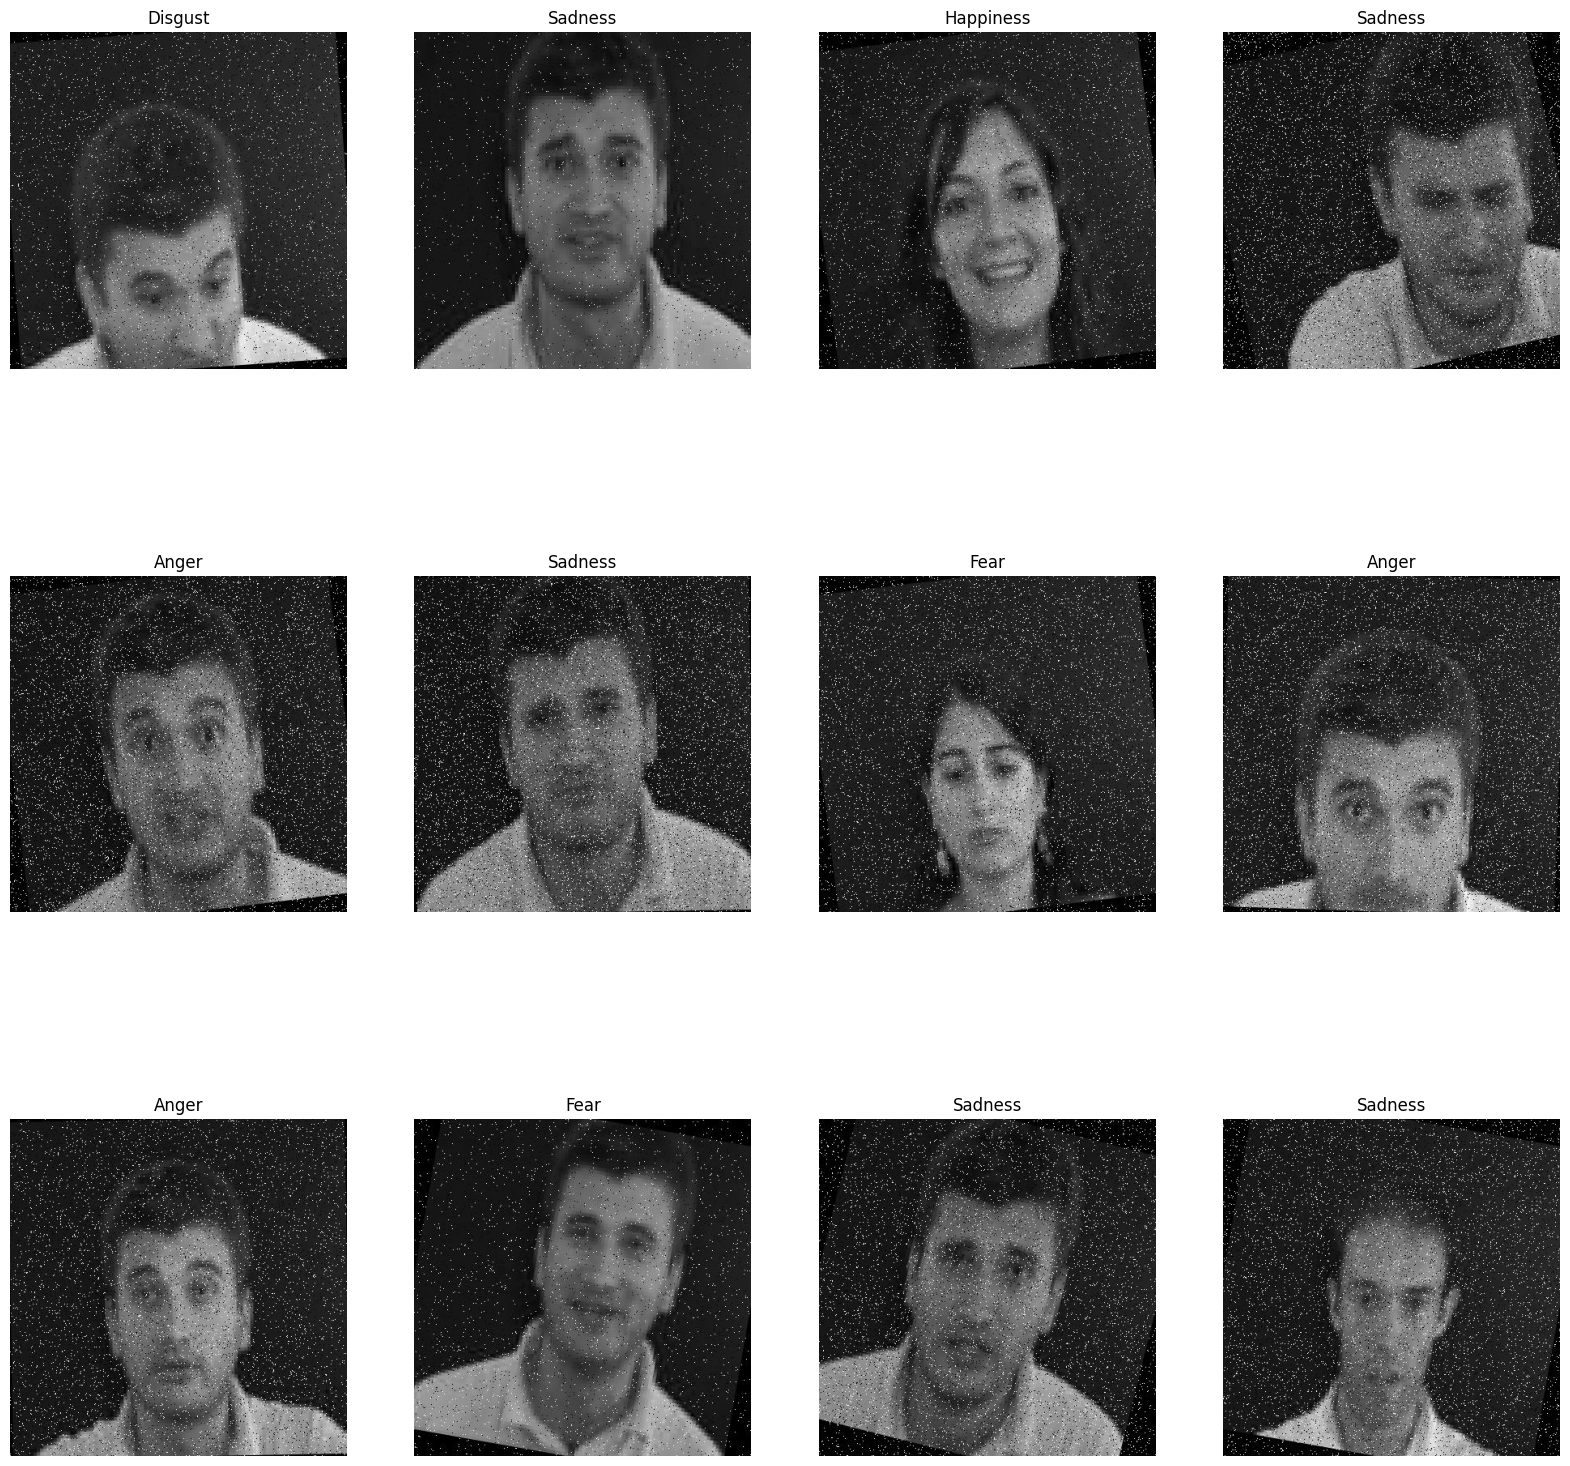

In [8]:
plt.figure(figsize=(20,20))
for i in range(12):
    plt.subplot(3,4,i+1)
    class_name = random.choice(class_names)
    img = view_random_image(target_dir="D:/emotiondataset/eINTERFACE_2021_Image/train/",target_class = class_name)

Now we preprocess the data inorder to fed it to the neural network.

In [9]:
from keras.preprocessing.image import ImageDataGenerator


In [10]:
train_datagen = ImageDataGenerator(rescale=1./255,
                                  shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True
                                  )
test_datagen = ImageDataGenerator(rescale = 1./255)

training_set = train_datagen.flow_from_directory(TRAIN_DIR,
                                                target_size = (128,128),
                                                 batch_size = batch_size,
                                                 class_mode = 'categorical'
                                                )

test_set = test_datagen.flow_from_directory(TEST_DIR,
                                                target_size = (128,128),
                                                 batch_size = batch_size,
                                                 class_mode = 'categorical'
                                                )

Found 11475 images belonging to 6 classes.
Found 1438 images belonging to 6 classes.


In here we are using the Sequential model for adding the layers to the stack.
later on different type of layers are stacked over each other to form a model.

In [11]:
model = Sequential()
model.add(Conv2D(16,(3,3), input_shape = (128,128,3), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Conv2D(32,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(units = 128, activation = 'relu'))
model.add(Dense(units = 6, activation = 'softmax'))

# compiling the CNN Model
model.compile(loss = 'categorical_crossentropy',optimizer = 'adam', metrics = ['accuracy'])

In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 126, 126, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 63, 63, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 61, 61, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 30, 30, 32)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 28800)             0         
                                                                 
 dense (Dense)               (None, 128)               3

Finally here the model is fitted to the training dataset.

In [ ]:
history = model.fit(training_set,
                        epochs = 50,
                        validation_data = test_set)

Epoch 1/50
102/180 [================>.............] - ETA: 3:28 - loss: 1.7861 - accuracy: 0.2287

We now save the model to our system. This pretrained model can now be used anytime. We need to specify the path at where the model would be saved into the system. If no path is provided then the model is saved in the same directory where your notebook is running.

In [ ]:
model.save('emtionclassicationCNN.h5')

Evaluating the model on testing dataset.(i.e unseen data)

In [ ]:
model.evaluate(test_set)

Following graph is plotted between the loss and the validation loss.

In [ ]:
pd.DataFrame(history.history)[['loss', 'val_loss']].plot()
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('Loss');

Following graph is plotted between accuracy and validation accuracy of the model

In [ ]:
pd.DataFrame(history.history)[['accuracy', 'val_accuracy']].plot()
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('Accuracy');

Finally we need to predict the result of the given model on a single image.<br>
Here we create a path variable for the saved model.<br>
now we load the model using keras.<br>

cv2 is used to read the single image from its path from the system.<br>
As the data which is used for trainng the model is preprocessed befor feeding to the network, we need to do the same preprocessing with the single image.

Atlast, we predict the result for the single image using the pretrained saved model.

In [ ]:
model_path = 'D:/emotiondataset/emtionclassicationCNN.h5'
loaded_model = keras.models.load_model(model_path)

import matplotlib.pyplot as plt
import numpy as np
import cv2
from PIL import Image

image = cv2.imread('D:/emotiondataset/eINTERFACE_2021_Image/test/Fear/myvideo_frames25_jpg.rf.1432fd6c08aba4b0108e96e61f3ffbc6.jpg')

image_fromarray = Image.fromarray(image,'RGB')
resize_image = image_fromarray.resize((128,128))
expand_input = np.expand_dims(resize_image, axis=0)
input_data = np.array(expand_input)
input_data = input_data/255

pred = loaded_model.predict(input_data)
result = pred.argmax()
result

In [ ]:
training_set.class_indices